# CASO FINAL - **INTELIGENCIA ARITIFICIAL EN LA EMPRESA**

## Ejercicio 1: OPTIMIZACIÓN DE UNA CAMPAÑA DE MARKETING 

El presente ejercicio es similar al caso práctico de repaso de optimización de campañas de marketing online ya realizado y lo que se pretende con este es asentar los conceptos relativos al algoritmo del bandido multibrazo, como son las ratios de explotación y exploración para la optimización de una campaña de marketing online.

Al igual que en el caso práctico de repaso, se tiene que hacer una campaña de marketing online para promocionar un determinado producto con la que se mostrará en una página web un banner con una imagen del producto que promocionar. Se han realizado cinco imágenes distintas del producto para poner en el banner con el objetivo de captar la atención del usuario para que pulse en el banner y acceda a la web con los detalles del producto que promocionar, pero, a diferencia del caso práctico de repaso, los resultados obtenidos serán diferentes.

Sin saber a priori cuál es la imagen que captará mayor atención, se debe aprender con base en los clics que se realizan sobre el banner qué imagen será las más llamativa y conseguirá más visitas aplicando el método del bandido multibrazo.

In [13]:
import random
import numpy as np
import pandas as pd

In [14]:
def multi_armed_bandit(num_games=1000, epsilon=0.1, verbose=False):
    
    bandits = [0.1, 0.6, 0.2, 0.1, 0.3]
    total_reward = 0
    # PARÁMETROS
    acum_reward_bandit = np.zeros(len(bandits))  
    num_selected_bandit = np.zeros(len(bandits)) 
    q_bandits = np.zeros(len(bandits))            
    
    if verbose:
        print("Initial Bandits Distribution\n  {}".format(bandits))
    
    for game in range(0,num_games):
        
        old_q_bandits = q_bandits.copy()
        
        if np.random.random() < epsilon:
            bandit = np.random.randint(len(bandits)) # Exploro
        else:
            bandit = np.random.choice(np.flatnonzero(q_bandits == q_bandits.max())) # Exploto 
            
        # Obtengo el reward
        reward = 1 if (np.random.random() < bandits[bandit]) else 0
        
        # Actualizo reward total
        total_reward += reward
        
        # Actualizo valor (Q) de la imagen
        acum_reward_bandit[bandit] += reward
        num_selected_bandit[bandit] += 1
        q_bandits[bandit] = acum_reward_bandit[bandit] / num_selected_bandit[bandit]
        
        if verbose:
            print("\nGAME {game}\n  Old Q_Bandits = {old_q_bandits}\n  Selected Bandit = {bandit} \
                  \n  Reward = {reward}\n  Q_Bandits = {q_bandits}"
                  .format(game=game+1, old_q_bandits=old_q_bandits, bandit=bandit, 
                          reward=reward, q_bandits=q_bandits))
    
    return bandits, total_reward, q_bandits, num_selected_bandit

El objetivo es encontrar la imagen que capte mayor atención de los usuarios, es decir que mayor número de clics obtenga:

Dado el método ya implementado en el notebook “multi_armed_bandit(num_games=1000, epsilon=0.1, verbose=False)”, se pide, modificando el valor de épsilon, responder a la siguientes preguntas para asentar los conceptos relativos al aprendizaje por refuerzo y, en particular, al algoritmo del bandido multibrazo:

Initial Bandits Distribution
  [0.1, 0.6, 0.2, 0.1, 0.3]
Bandits Distribution games
  [ 18. 924.  20.  21.  17.]
Q(a) Bandits
  [0.0556 0.5985 0.25   0.1429 0.0588]
CLICKS: 563


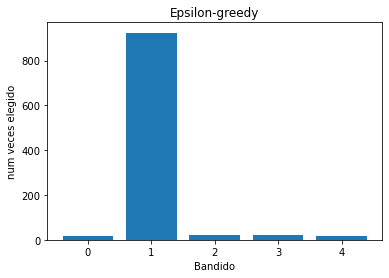

In [15]:
'''
En este primer caso, vamos a definir un porcentaje del exploración del 10 % (epsilon = 0,1), lo que significa que 
de cada 100 impresiones de página en 90 se mostrará la imagen que mayor valor de recompensa tenga y en 10, 
una imagen seleccionada al azar.

'''


EPSILON = 0.1 

import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=4)

bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000, 
                                                                           epsilon=EPSILON, 
                                                                           verbose=False)

print("Initial Bandits Distribution\n  {}".format(bandits))
print("Bandits Distribution games\n  {}".format(num_selected_bandit))
print("Q(a) Bandits\n  {}".format(q_bandits))
print("CLICKS: {}".format(total_reward))

# Mostramos en una gráfica de barras el número de veces que elegimos cada "tragaperras"
plt.title('Epsilon-greedy')
plt.bar(range(0,len(bandits)), num_selected_bandit)
plt.xlabel('Bandido')
plt.ylabel('num veces elegido')
plt.show()

Initial Bandits Distribution
  [0.1, 0.6, 0.2, 0.1, 0.3]
Bandits Distribution games
  [ 38. 857.  34.  35.  36.]
Q(a) Bandits
  [0.0789 0.5928 0.2059 0.1429 0.3889]
CLICKS: 537


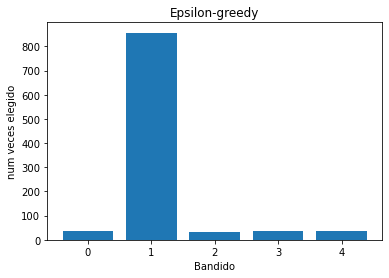

In [16]:
'''
Para el segundo caso, vamos a definir un porcentaje del exploración del 20 % (epsilon = 0,2), lo que significa que 
de cada 100 impresiones de página en 80 se mostrará la imagen que mayor valor de recompensa tenga y en 20, 
una imagen seleccionada al azar.

'''

EPSILON = 0.2 

import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=4)

bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000, 
                                                                           epsilon=EPSILON, 
                                                                           verbose=False)

print("Initial Bandits Distribution\n  {}".format(bandits))
print("Bandits Distribution games\n  {}".format(num_selected_bandit))
print("Q(a) Bandits\n  {}".format(q_bandits))
print("CLICKS: {}".format(total_reward))

# Mostramos en una gráfica de barras el número de veces que elegimos cada "tragaperras"
plt.title('Epsilon-greedy')
plt.bar(range(0,len(bandits)), num_selected_bandit)
plt.xlabel('Bandido')
plt.ylabel('num veces elegido')
plt.show()

Initial Bandits Distribution
  [0.1, 0.6, 0.2, 0.1, 0.3]
Bandits Distribution games
  [ 66. 756.  67.  59.  52.]
Q(a) Bandits
  [0.0909 0.5648 0.2388 0.1017 0.2692]
CLICKS: 469


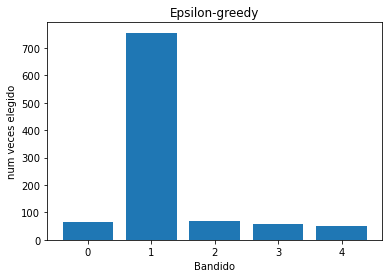

In [17]:
'''
Para el siiguiente caso, vamos a definir un porcentaje del exploración del 30 % (epsilon = 0,3), lo que significa que 
de cada 100 impresiones de página en 70 se mostrará la imagen que mayor valor de recompensa tenga y en 30, 
una imagen seleccionada al azar.

'''

EPSILON = 0.3

import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=4)

bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000, 
                                                                           epsilon=EPSILON, 
                                                                           verbose=False)

print("Initial Bandits Distribution\n  {}".format(bandits))
print("Bandits Distribution games\n  {}".format(num_selected_bandit))
print("Q(a) Bandits\n  {}".format(q_bandits))
print("CLICKS: {}".format(total_reward))

# Mostramos en una gráfica de barras el número de veces que elegimos cada "tragaperras"
plt.title('Epsilon-greedy')
plt.bar(range(0,len(bandits)), num_selected_bandit)
plt.xlabel('Bandido')
plt.ylabel('num veces elegido')
plt.show()

Initial Bandits Distribution
  [0.1, 0.6, 0.2, 0.1, 0.3]
Bandits Distribution games
  [  9. 640.  11.   7. 333.]
Q(a) Bandits
  [0.1111 0.6062 0.1818 0.     0.2763]
CLICKS: 483


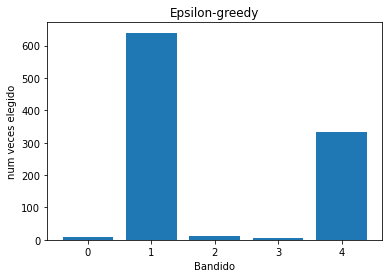

In [18]:
'''
En este caso, vamos a definir un porcentaje del exploración del 5 % (epsilon = 0,05), lo que significa que 
de cada 100 impresiones de página en 95 se mostrará la imagen que mayor valor de recompensa tenga y en 5, 
una imagen seleccionada al azar.

'''

EPSILON = 0.05

import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=4)

bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000, 
                                                                           epsilon=EPSILON, 
                                                                           verbose=False)

print("Initial Bandits Distribution\n  {}".format(bandits))
print("Bandits Distribution games\n  {}".format(num_selected_bandit))
print("Q(a) Bandits\n  {}".format(q_bandits))
print("CLICKS: {}".format(total_reward))

# Mostramos en una gráfica de barras el número de veces que elegimos cada "tragaperras"
plt.title('Epsilon-greedy')
plt.bar(range(0,len(bandits)), num_selected_bandit)
plt.xlabel('Bandido')
plt.ylabel('num veces elegido')
plt.show()

Initial Bandits Distribution
  [0.1, 0.6, 0.2, 0.1, 0.3]
Bandits Distribution games
  [ 16. 929.  23.  16.  16.]
Q(a) Bandits
  [0.     0.5899 0.2609 0.0625 0.375 ]
CLICKS: 561


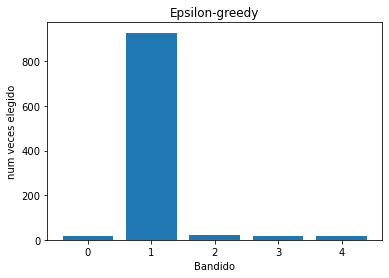

In [19]:
'''
En el último caso, vamos a definir un porcentaje del exploración del 7 % (epsilon = 0,07), lo que significa que 
de cada 100 impresiones de página en 93 se mostrará la imagen que mayor valor de recompensa tenga y en 7, 
una imagen seleccionada al azar.

'''

EPSILON = 0.07

import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=4)

bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000, 
                                                                           epsilon=EPSILON, 
                                                                           verbose=False)

print("Initial Bandits Distribution\n  {}".format(bandits))
print("Bandits Distribution games\n  {}".format(num_selected_bandit))
print("Q(a) Bandits\n  {}".format(q_bandits))
print("CLICKS: {}".format(total_reward))

# Mostramos en una gráfica de barras el número de veces que elegimos cada "tragaperras"
plt.title('Epsilon-greedy')
plt.bar(range(0,len(bandits)), num_selected_bandit)
plt.xlabel('Bandido')
plt.ylabel('num veces elegido')
plt.show()

### 1. ¿Cuál es el valor de épsilon que maximiza la imagen con mayor número de clics?

Como vemos es para el valor epsilon 0.1 obtenemos un mayor numeros de clic que ninguno de los otros valores probados. Por  lo que, un valor de entorno al valor 0.1 será el que maximice el numero de clics. Un valor optimo se encntrará entre los valores 0.07 y 0.2

### 2. ¿Cuál es la imagen que más clics obtiene y cuántos?

Considerando un epsilon de 0.1, la imagen 1 es la que más clics obtiene con un total de 579

### 3. Poniendo una ratio de explotación del 100 %, ¿qué resultado se obtiene?

Initial Bandits Distribution
  [0.1, 0.6, 0.2, 0.1, 0.3]
Bandits Distribution games
  [198. 183. 213. 197. 209.]
Q(a) Bandits
  [0.1061 0.5902 0.2207 0.1218 0.3636]
CLICKS: 276


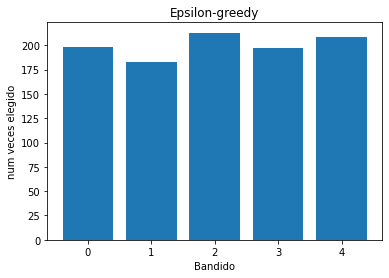

In [20]:
EPSILON = 1

import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=4)

bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000, 
                                                                           epsilon=EPSILON, 
                                                                           verbose=False)

print("Initial Bandits Distribution\n  {}".format(bandits))
print("Bandits Distribution games\n  {}".format(num_selected_bandit))
print("Q(a) Bandits\n  {}".format(q_bandits))
print("CLICKS: {}".format(total_reward))

# Mostramos en una gráfica de barras el número de veces que elegimos cada "tragaperras"
plt.title('Epsilon-greedy')
plt.bar(range(0,len(bandits)), num_selected_bandit)
plt.xlabel('Bandido')
plt.ylabel('num veces elegido')
plt.show()

Como podemos ver, aplicando un ratio de explotacion tan grande no conseguimos detectar la imagen con mayor numero de clics ya que el 100% de las imagenes se seleccionan de manera aleatoria, es decir, no estamos explotando la información que se va obteniendo.

## Ejercicio 2: CLASIFICACION DE TWEETS EN ESPAÑOL

El presente caso práctico es similar al caso práctico de repaso de análisis de sentimientos, pero en este ejercicio se tienen que realizar los procesos completos de:

- Normalización de textos (procesamiento de textos).

- Clasificación de textos.

Al igual que en el caso práctico de repaso, el ejercicio consiste en clasificar una serie de tuits en español que están clasificados como positivos, neutros, negativos o none (desconocido), aunque solo se va a trabajar con los tuits clasificados correctamente (los no desconocidos).

Para este ejercicio se pide realizar los mismos pasos que en el caso práctico de repaso a excepción de la creación de la bolsa de palabras. En este ejercicio, en vez de crearse una bolsa de palabras con TF-IDF, se creará de frecuencias, realizando los siguientes pasos:

### 1. CARGAR LOS DATOS

In [21]:
df = pd.read_csv('tweets_castellano.txt', sep="::::", names=['tweet','sentimiento'] ,engine='python')

In [22]:

# Eliminamos los tweets clasificados correctamente
df = df[df['sentimiento'].isin(['positivo', 'neutro', 'negativo'])]

tweets = [tuple(x) for x in df.values]

print('Número de Tweets Cargados: {num}'.format(num=len(tweets)))
df.head(5)

Número de Tweets Cargados: 5735


,tweet,sentimiento
1,@PauladeLasHeras No te libraras de ayudar me/n...,neutro
2,@marodriguezb Gracias MAR,positivo
3,"Off pensando en el regalito Sinde, la que se v...",negativo
4,Conozco a alguien q es adicto al drama! Ja ja ...,positivo
6,Toca @crackoviadeTV3 . Grabación dl especial N...,positivo


### 2. NORMALIZACION

Para ello, vamos a usar la libreria spaCy. Realizaremos una serie de pasos para normalizarlos: 
- Pasamos las frases a minúsculas.

- Sustituimos los puntos por espacios ya que hay muchas palabras unidas por un punto

- Quitamos la almuhadilla de los hashtags para considerarlos como palabras.

- Eliminamos los signos de puntuación.

- Eliminamos las palabras con menos de 3 caracteres.

- Eliminamos las Stop-Words.

- Eliminamos los enlaces(http) y las menciones (@)

- Pasamos la palabra a su lema

Se pueden hacer más pasos, pero en este caso no es necesario

In [29]:
import spacy
import en_core_web_sm
nlp=spacy.load('en_core_web_sm')

In [31]:
# Dividimos los datos en dos listas, sinedo la X los distintos tweets y la Y el sentimiento
X = [doc[0] for doc in tweets]
y = np.array([doc[1] for doc in tweets])

def normalize(sentenses):

    for index, sentense in enumerate(sentenses):
        # Tokenizamos el tweets realizando los puntos 1,2 y 3.
        sentense = nlp(sentense.lower().replace('.', ' ').replace('#', ' ').strip())
        # Puntos 4,5,6,7 y 8
        sentenses[index] = " ".join([word.lemma_ for word in sentense if (not word.is_punct)
                                     and (len(word.text) > 2) and (not word.is_stop) 
                                     and (not word.text.startswith('@')) 
                                     and (not word.text.startswith('http'))
                                     and (not ':' in word.text)])
    return sentenses

# Normalizamos las frases
X_norm = normalize(X)

### 3. CREACIÓN DE LA BOLSA DE PALABRAS

Vamos a usar la clase "CountVectorizer" de la libreria scikit

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000, min_df=5)
vectorizer.fit_transform(X_norm)

# Pasamos los tweets normalizados a Bolsa de palabras
X_bow = vectorizer.transform(X_norm)

### 4. PARICIONADO DE DATOS EN TRAIN Y TEST

En este apartado, vamos a partir los datos para entrenar y testar el modelo. Para ello, usaremos un 90% de os datos para entrenar el modelo y un 10% para el grupo test.

In [33]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.1, random_state=0)

print('Número de Tweets para el entrenamiento: {num}'.format(num=X_train.shape[0]))
print('Número de Tweets para el test: {num}'.format(num=X_test.shape[0]))

Número de Tweets para el entrenamiento: 5161
Número de Tweets para el test: 574


### 5. CREACIÓN DE LOS MODELOS

Vamos a crear 5 modelos diferentes, siendo estos:
- Multinomial Naive Bayes

- Bernoulli Naive Bayes

- Regresion Logistica

- Support Vector Machine Lineal

- Random Forest


In [34]:
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [35]:
mnb = MultinomialNB()
bnb = BernoulliNB()
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
svm_lin = SVC(kernel='linear')
# svm_rbf = SVC(kernel='rbf')
rf = RandomForestClassifier(n_estimators=500, bootstrap=True, criterion='gini', max_depth=50, random_state=0)

clasificadores = {'Multinomial NB': mnb,
                  'Bernoulli NB': bnb,
                  'Regresion Logistica': lr,
                  'SVM lineal': svm_lin,
                 # 'SVM Kernel rbf': svm_rbf,
                  'Random Forest': rf}


# Ajustamos los modelos y calculamos el accuracy para los datos de entrenamiento
for k, v in clasificadores.items():
    print ('CREANDO MODELO: {clas}'.format(clas=k))
    v.fit(X_train, y_train)

CREANDO MODELO: Multinomial NB
CREANDO MODELO: Bernoulli NB
CREANDO MODELO: Regresion Logistica
CREANDO MODELO: SVM lineal
CREANDO MODELO: Random Forest


### 6. EVALUACIÓN DE LOS MODELOS

Vamos a calcular las mettrcas de accuracy, precisión, recall y F1

In [36]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

def evaluation(model, name, X_train, y_train, X_test, y_test):

    model_dict = {}
    model_dict['name'] = name
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    model_dict['accuracy_train'] = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['accuracy_tests'] = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    model_dict['precision_train'] = precision_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['precision_tests'] = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    model_dict['recall_train'] = recall_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['recall_tests'] = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    model_dict['f1_train'] = f1_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['f1_tests'] = f1_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    
    return model_dict


# Calculamos las métricas de los modelos por separado
evaluacion = list()
for key, model in clasificadores.items():
    evaluacion.append(evaluation(model=model, name=key, 
                                 X_train=X_train, y_train=y_train,
                                 X_test=X_test, y_test=y_test))

# Pasamos los resultados a un DataFrame para visualizarlos mejor
df = pd.DataFrame.from_dict(evaluacion)
df.set_index("name", inplace=True)
df

C:\Users\viole\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy_train,accuracy_tests,precision_train,precision_tests,recall_train,recall_tests,f1_train,f1_tests
name,,,,,,,,
Multinomial NB,0.732610,0.635889,0.725695,0.614904,0.732610,0.635889,0.719623,0.621104
Bernoulli NB,0.728735,0.625436,0.718517,0.599312,0.728735,0.625436,0.715366,0.608178
Regresion Logistica,0.787251,0.594077,0.788397,0.567267,0.787251,0.594077,0.773063,0.578867
SVM lineal,0.793451,0.604530,0.795599,0.578241,0.793451,0.604530,0.781757,0.588910
Random Forest,0.857392,0.602787,0.878570,0.524835,0.857392,0.602787,0.851051,0.559124


Vamos a representar las 4 metricas calculadas en funcion de cada uno de los modelos para poder ver visualmente cual es el mejor.

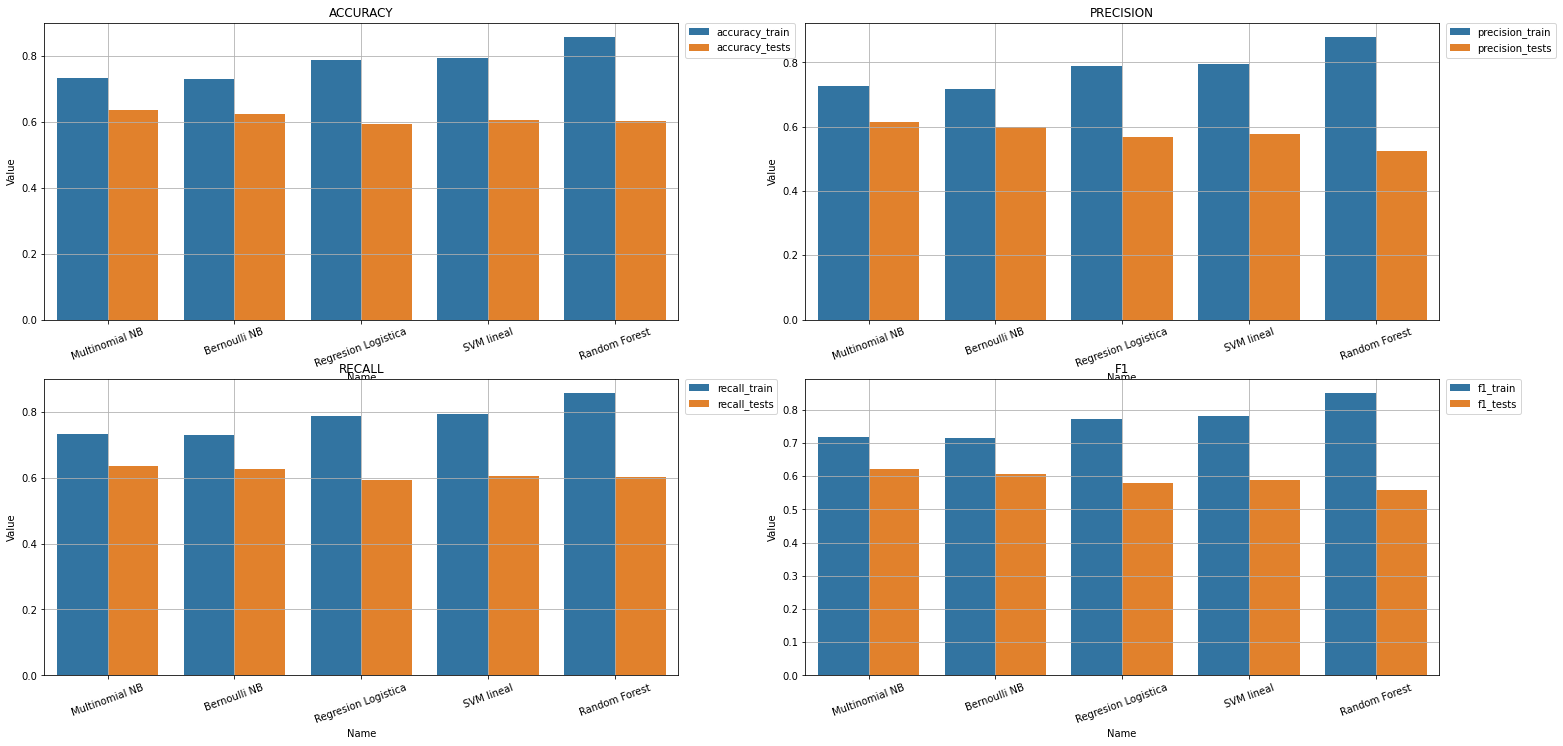

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Métricas a pintar
METRICS = ["accuracy", "precision", "recall", "f1"]

# Transformamos el dataframe para pintar las gráficas con seaborn
df_plot = df.reset_index().melt(id_vars='name').rename(columns=str.title)

plt.figure(figsize=(25, 12))
pos = 1
for metric in METRICS:
    # Filtramos la métrica a pintar
    df_aux = df_plot[df_plot['Variable'].str.contains(metric)]
    
    # Pintamos la gráfica en su posición 2x2
    plt.subplot(2, 2, pos)
    sns.barplot(x='Name', y='Value', hue='Variable', data=df_aux)
    plt.title(metric.upper())
    plt.grid()
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation=20)
    pos += 1
plt.show()

Como podemos ver, las metricas dan los mejores resultados para el random forest

Por últimno, vamos a ver las matrices de confusión de los modelos tanto para los datos de entrenamiento como para los de test.

Obteniendo Matriz de Confusión de: Multinomial NB
Obteniendo Matriz de Confusión de: Bernoulli NB
Obteniendo Matriz de Confusión de: Regresion Logistica
Obteniendo Matriz de Confusión de: SVM lineal
Obteniendo Matriz de Confusión de: Random Forest


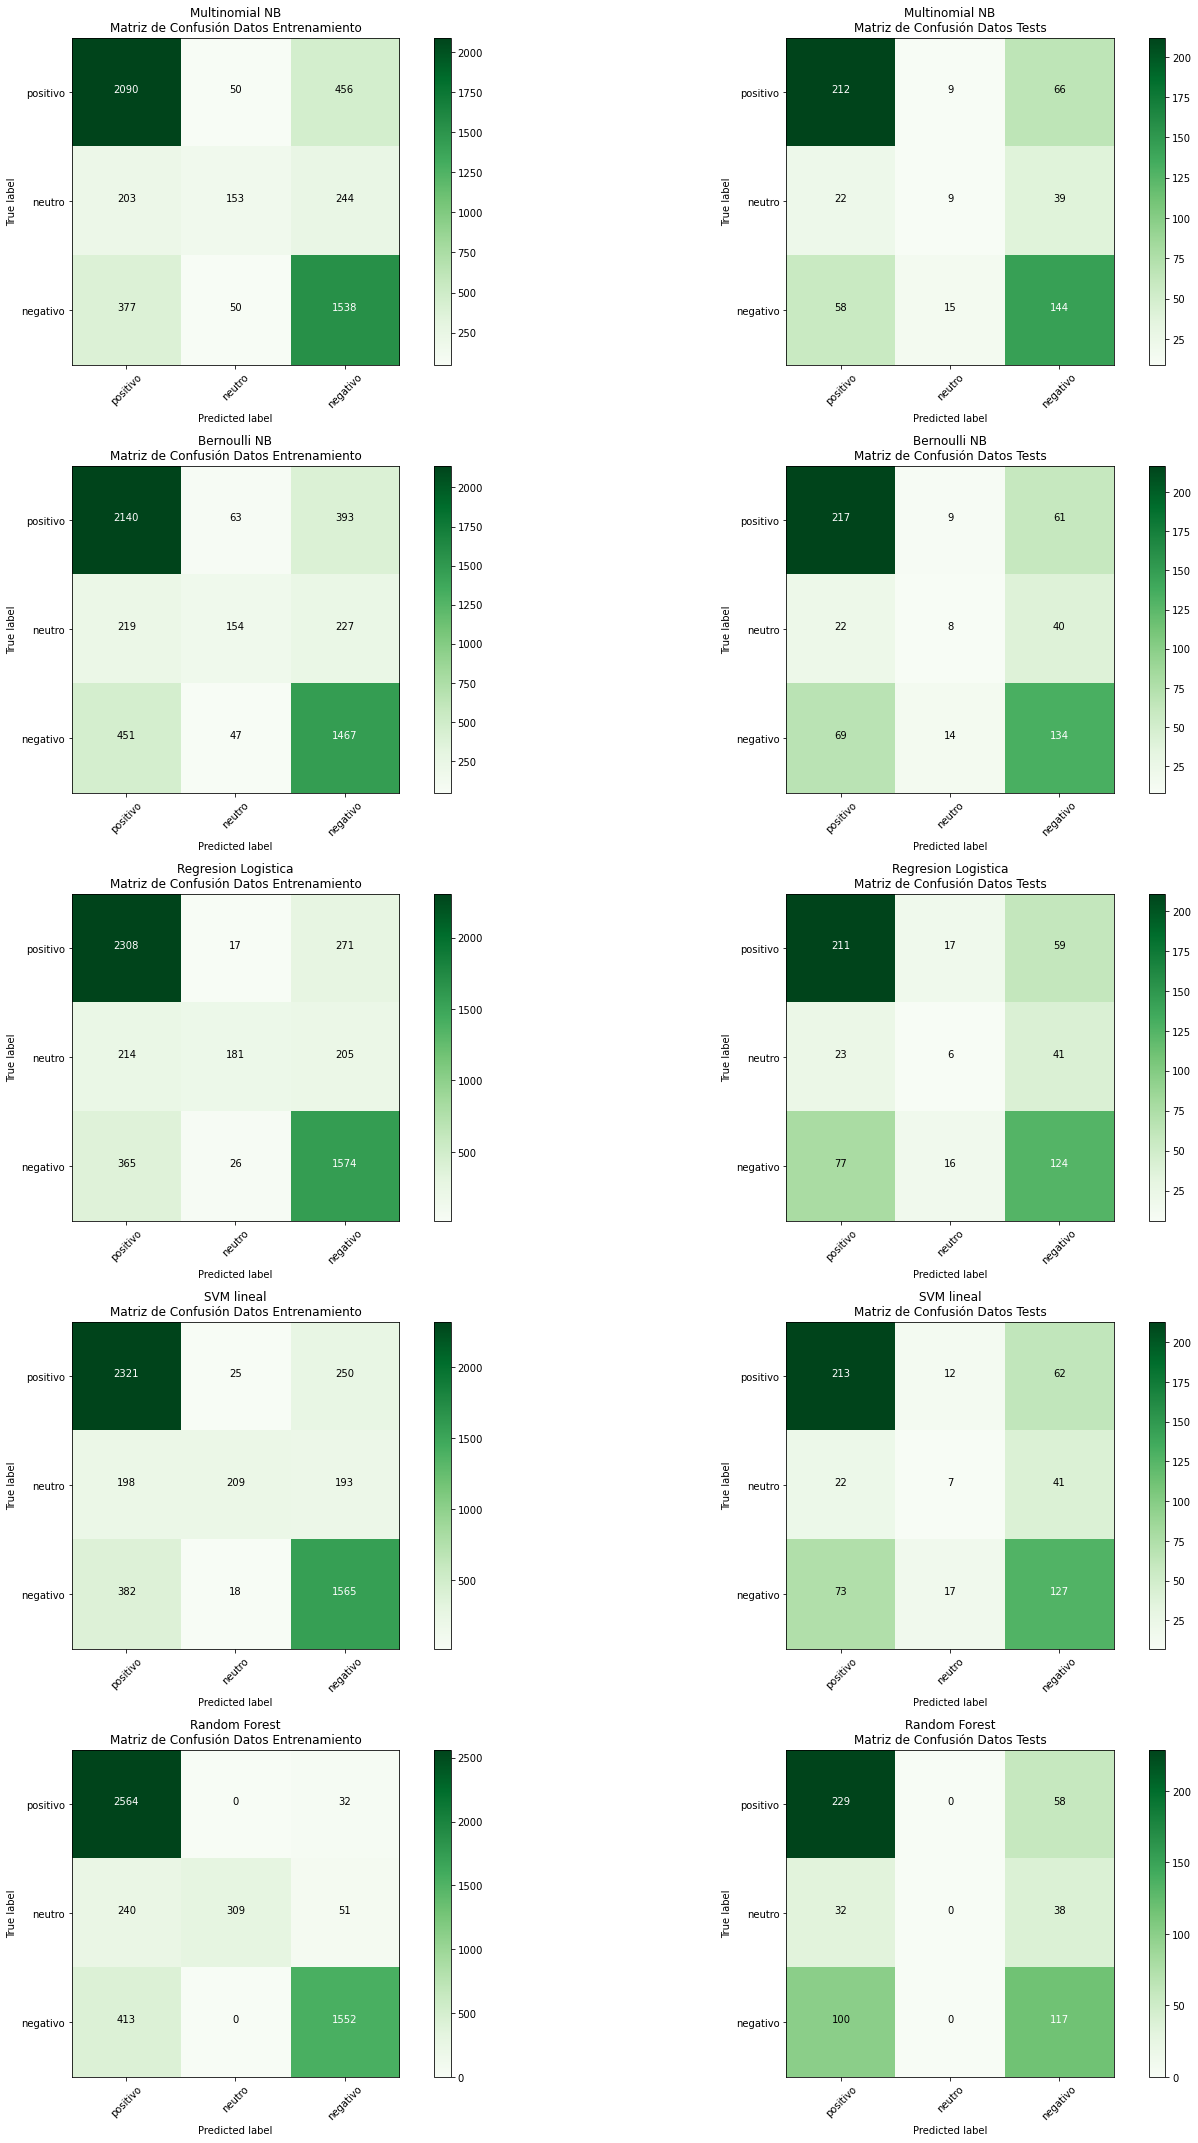

In [38]:
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

from sklearn.metrics import confusion_matrix

polaridad = ['positivo', 'neutro', 'negativo']

# Obtenemos las Matrices de confusión
msc = list()
for k, v in clasificadores.items():
    print ('Obteniendo Matriz de Confusión de: {model}'.format(model=k))
    model = {}
    model['name'] = k
    y_pred_train = v.predict(X_train)
    y_pred_test = v.predict(X_test)
    model['confusion_matrix_train'] = confusion_matrix(y_true=y_train, y_pred=y_pred_train, labels=polaridad)
    model['confusion_matrix_test'] = confusion_matrix(y_true=y_test, y_pred=y_pred_test, labels=polaridad)
    msc.append(model)

    
# Definimos el heatmap de la matriz de confusión
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Pintamos las matrices de confusión
plt.figure(figsize=(20, 35))
pos = 0
for mc in msc:
    pos += 1
    plt.subplot(6, 2, pos)
    plot_confusion_matrix(mc['confusion_matrix_train'], classes=polaridad, 
                          title='{}\nMatriz de Confusión Datos Entrenamiento'.format(mc['name']))
    pos += 1
    plt.subplot(6, 2, pos)
    plot_confusion_matrix(mc['confusion_matrix_test'], classes=polaridad, 
                          title='{}\nMatriz de Confusión Datos Tests'.format(mc['name'] ))
plt.show()

## Ejercicio 3: OPTIMIZACIÓN DE UNA CAMPAÑA DE MARKETING 

En este ejercicio, al igual que en el caso práctico de repaso, se va a implementar y evaluar un sistema de recomendación basado en filtrado colaborativo con KNN usando la base de datos de MovieLens 100K que contiene 100 000 votos con notas de 1 a 5 de 943 usuarios sobre 1682 películas.

Este dataset ha sido dividido en votaciones de entrenamiento (80 %) y votaciones de test (20 %). Además, para simplificar el problema, los códigos de usuarios e ítems han sido modificados para que comience en 0 y terminen en el número de (usuarios/ítems) −1.

En el notebook se encuentran implementados una serie de métodos que realizan las siguientes tareas:

### 1. LECTURA DE VOTOS

In [39]:
def read_ratings_matrix(file):

    ratings = [[None for _ in range(NUM_ITEMS)] for _ in range(NUM_USERS)] 
    
    with open(file, 'r') as reader:
        for line in reader:
            [u, i, rating] = line.split("::")
            ratings[int(u)][int(i)] = int(rating)
            
    return ratings

### 2. CALCULO DE SIMILARIDADES CON MSSD, COSENO Y JMSD

In [40]:
def calculate_similarities(ratings_matrix, similarity_metric):
    
    # Creamos una matriz con valores de similaridad a -1
    similarities = [[float('-inf') for _ in range(NUM_USERS)] for _ in range(NUM_USERS)]
    
    # Recorremos la matriz por usuario
    for i, u in enumerate(ratings_matrix):
        if i%100==0:
            print("\tProcesandos {} Usuarios".format(i))
        for j, v in enumerate(ratings_matrix):
            if j != i: # No calculamos la similaridad para un mismo usuario
                similarities[i][j] = similarity_metric(u,v)
        
    return similarities


def rating_average(ratings):
    
    acc = 0
    count = 0
    for id_item in range(len(ratings)):
        if ratings[id_item] != None:
            acc += ratings[id_item]
            count += 1
    return acc / count


def msd_similarity(u, v):
    
    sum_r = 0 
    count = 0
    
    for i in range(len(u)):
        if u[i] != None and v[i] != None:
            count += 1
            sum_r += math.pow((u[i] - v[i])/(MAX_RATING - MIN_RATING), 2)
            
    if count > 0:
        sim = 1-(sum_r/float(count))
        return sim
    else:
        return None
    
    
def cosine_similarity(u, v):
    
    numerador = 0
    denominador_u = 0
    denominador_v = 0
    
    count = 0
    
    for i in range(len(u)):
        if u[i] != None and v[i] != None:
            numerador += u[i] * v[i]
            denominador_u += math.pow(u[i], 2)
            denominador_v += math.pow(v[i], 2)
            count += 1
    if count > 0 and denominador_u != 0 and denominador_v != 0:
        cos = numerador / (math.sqrt(denominador_u) * math.sqrt(denominador_v))
        return cos
    else:
        return None
    
    
def jmsd_similarity(u, v):
    
    union = 0
    intersection = 0
    
    for i in range(len(u)):
        if u[i] != None and v[i] != None:
            intersection += 1
            union += 1
        elif u[i] != None or v[i] != None:  
            union += 1
            
    if intersection > 0:
        jaccard = intersection / union
        return jaccard * msd_similarity(u,v)
    else:
        return None


### 3. CALCULO DE LOS K-VECINOS

In [41]:
def calculate_neighbors(similarities_matrix, k_neighbors):
    
    neighbors = [None for _ in range(NUM_USERS)]
    
    for index, similarities in enumerate(similarities_matrix):
        i_neighbors = [i[0] for i in sorted(enumerate(similarities), 
                                            key=lambda x:float('-inf') if x[1] is None else x[1], 
                                            reverse=True)]
        neighbors[index] = i_neighbors[0:k_neighbors]

    return neighbors

### 4.  CALCULO DE LAS PREDICCIONES CON EL METODO DE MEDIA PONDERADA

In [42]:
def calculate_weighted_average_prediction(ratings_matrix, similarities_matrix, neighbors):
    
    # Creamos una matriz para el cálculo de predicciones
    predictions = [[None for _ in range(NUM_ITEMS)] for _ in range(NUM_USERS)]
    
    # Recorremos la matriz de votos
    for i, u in enumerate(ratings_matrix):
        for j, v in enumerate(ratings_matrix[0]):
            # Obtenemos las similaridades con cada vecino y si voto
            numerador = 0 
            denominador = 0
            for neighbor in neighbors[i]:
                if ratings_matrix[neighbor][j] != None:
                    numerador += similarities_matrix[i][neighbor] * ratings_matrix[neighbor][j]
                    denominador += similarities_matrix[i][neighbor]
                    
            predictions[i][j] = None if denominador == 0 else numerador/denominador
            
    return predictions


### 5. EVALUACION DE UN SISTEMA DE RECOMENDACIÓN CON MAE

In [43]:
def get_mae(ratings_matrix, predictions_matrix):
    
    mae_users = [None for _ in ratings_matrix]
    
    # Recorremos la matriz de votos
    for i, u in enumerate(ratings_matrix):
        # Calculamos el MAE de cada usuario
        sum_user = 0
        count = 0
        for j, v in enumerate(ratings_matrix[0]):
            if ratings_matrix[i][j] != None and predictions_matrix[i][j] != None:
                sum_user += abs(ratings_matrix[i][j] - predictions_matrix[i][j])
                count += 1
        mae_users[i] = sum_user/count if count > 0 else None

    return np.nanmean(np.array(mae_users, dtype=np.float), axis=0)

A continuación se implementa el "Sistema de Recomendación", en el cual:
- Calcularemos las similaridades para distintas métricas de similaridad
- Realizaremos las predicciones para diferentes números de vecinos
- Evaluaremos para cada experimento los conjuntos de entrenamiento y test.

In [45]:
import math


# Número de usuarios e items
NUM_USERS = 943
NUM_ITEMS = 1682

# Notas máximas y mínimas dadas en la matriz de votos
MIN_RATING = 1
MAX_RATING = 5

# Ruta del los datasets de entrenamiento y test
TRAIN_RATINGS_FILE = 'movielens_100k_training.txt'
TEST_RATINGS_FILE = 'movielens_100k_test.txt'

# Lectura de los Datasets de Entrenamiento y Test
train_ratings = read_ratings_matrix(file=TRAIN_RATINGS_FILE)
test_ratings = read_ratings_matrix(file=TEST_RATINGS_FILE)

# Metricas, K vecinos y predicciones a probar
SIMILARITIES_METRICS = [('MSD', msd_similarity), 
                        ('COSENO', cosine_similarity),  
                        ('JMSD', jmsd_similarity)]
K_NEIGHBORS = [25, 50, 100, 150, 200, 300, 400, 500]


# Guardo en una lista los experimentos realizados, siendo un experimento una lista con 4 posiciones:
#     1.- Métrica de similaridad
#     2.- Número de vecinos
#     3.- MAE
#     4.- Entrenamiento o Test
experiments = []
        
for metric in SIMILARITIES_METRICS:
    print('{}: Cálculo de similatidades'.format(metric[0]))
    similarities_matrix = calculate_similarities(ratings_matrix=train_ratings, 
                                                 similarity_metric=metric[1])
    for k in K_NEIGHBORS:
        
        print('  {} Vecinos'.format(k))
        neighbors_matrix = calculate_neighbors(k_neighbors=k, 
                                               similarities_matrix=similarities_matrix)
        
        # Calculamos las predicciones
        predictions = calculate_weighted_average_prediction(ratings_matrix=train_ratings,
                                                            similarities_matrix=similarities_matrix,
                                                            neighbors=neighbors_matrix)
        
        # Calculamos el MAE para entrenamiento y test
        mae_train = get_mae(ratings_matrix=train_ratings, 
                            predictions_matrix=predictions)
        mae_test = get_mae(ratings_matrix=test_ratings, 
                            predictions_matrix=predictions)
        
        # Añadimos los experimentos a la lista
        experiments.append([metric[0], k, mae_train, "Train"])
        experiments.append([metric[0], k, mae_test, "Test"])
        

MSD: Cálculo de similatidades
	Procesandos 0 Usuarios
	Procesandos 100 Usuarios
	Procesandos 200 Usuarios
	Procesandos 300 Usuarios
	Procesandos 400 Usuarios
	Procesandos 500 Usuarios
	Procesandos 600 Usuarios
	Procesandos 700 Usuarios
	Procesandos 800 Usuarios
	Procesandos 900 Usuarios
  25 Vecinos


C:\Users\viole\AppData\Local\Temp/ipykernel_8340/305685725.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.nanmean(np.array(mae_users, dtype=np.float), axis=0)


  50 Vecinos
  100 Vecinos
  150 Vecinos
  200 Vecinos
  300 Vecinos
  400 Vecinos
  500 Vecinos
COSENO: Cálculo de similatidades
	Procesandos 0 Usuarios
	Procesandos 100 Usuarios
	Procesandos 200 Usuarios
	Procesandos 300 Usuarios
	Procesandos 400 Usuarios
	Procesandos 500 Usuarios
	Procesandos 600 Usuarios
	Procesandos 700 Usuarios
	Procesandos 800 Usuarios
	Procesandos 900 Usuarios
  25 Vecinos
  50 Vecinos
  100 Vecinos
  150 Vecinos
  200 Vecinos
  300 Vecinos
  400 Vecinos
  500 Vecinos
JMSD: Cálculo de similatidades
	Procesandos 0 Usuarios
	Procesandos 100 Usuarios
	Procesandos 200 Usuarios
	Procesandos 300 Usuarios
	Procesandos 400 Usuarios
	Procesandos 500 Usuarios
	Procesandos 600 Usuarios
	Procesandos 700 Usuarios
	Procesandos 800 Usuarios
	Procesandos 900 Usuarios
  25 Vecinos
  50 Vecinos
  100 Vecinos
  150 Vecinos
  200 Vecinos
  300 Vecinos
  400 Vecinos
  500 Vecinos


In [46]:
# PASAMOS LOS RESULTADOS A UN DATAFRAME

df_results = pd.DataFrame.from_records(experiments,
                                       columns=['Metrica', 'K-Vecinos', 'MAE', 'Train/Test'])

In [47]:
# MOSTRAMOS LOS RESULTADOS DE LOS EXPERIMENTOS CON LOS DATOS DE ENTRENAMIENTO Y TEST

pd.pivot_table(df_results[df_results['Train/Test']=='Train'], 
               values=['MAE'], 
               index=['K-Vecinos'],
               columns=['Metrica'])

pd.pivot_table(df_results[df_results['Train/Test']=='Test'], 
               values=['MAE'], 
               index=['K-Vecinos'],
               columns=['Metrica'])

MAE                    
Metrica      COSENO      JMSD       MSD
K-Vecinos                              
25         0.991211  0.881689  0.943860
50         0.983949  0.857734  0.903342
100        0.945913  0.850982  0.871570
150        0.901831  0.860059  0.845946
200        0.890210  0.859590  0.832801
300        0.878561  0.857354  0.829561
400        0.865961  0.863219  0.836281
500        0.862582  0.865219  0.839224

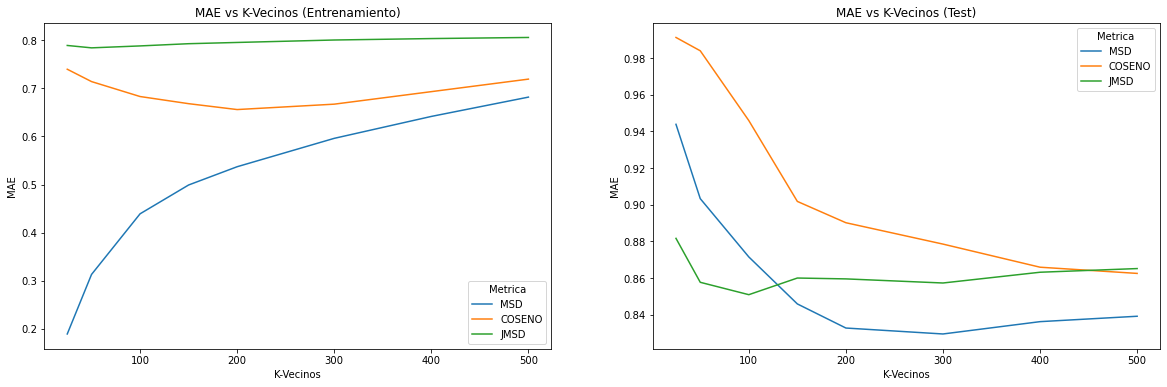

In [48]:
# REPRESENTAMOS LOS RESULTADOS GRAFICAMENTE

plt.subplots(figsize = (20, 6))
# Pintamos el MAE con los datos de Entrenamiento
plt.subplot(1, 2, 1)
plt.title('MAE vs K-Vecinos (Entrenamiento)')
sns.lineplot(x="K-Vecinos", y="MAE", hue="Metrica", data=df_results[df_results['Train/Test']=='Train'])

# Pintamos el MAE con los datos de Test
plt.subplot(1, 2, 2)
plt.title('MAE vs K-Vecinos (Test)')
sns.lineplot(x="K-Vecinos", y="MAE", hue="Metrica", data=df_results[df_results['Train/Test']=='Test'])

plt.show()